In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
import re 
nltk.download('wordnet')
import nltk
nltk.download('punkt')


C:\Users\chauk\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chauk\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\chauk\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chauk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chauk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

In [3]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
train.shape

(15819, 3)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [6]:
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


# Exploratory data analysis

In [7]:
train['sentiment'].value_counts() # total number of each obsservation under the train data

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

C:\Users\chauk\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

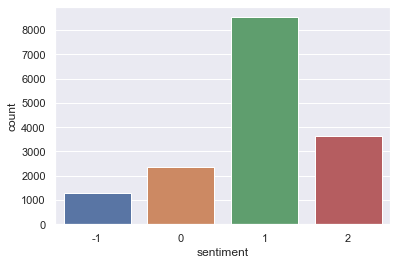

In [8]:
## Plot the Sentiment value count 
sns.countplot(train["sentiment"])

<AxesSubplot:xlabel='message', ylabel='Density'>

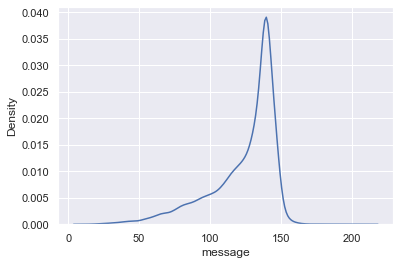

In [9]:
## Lenght of the Text using KDEplot
lenght = train["message"].str.len()
sns.kdeplot(lenght)

In [10]:
## Checking for stopwords
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'ours', "won't", 'above', 'itself', 'any', 'doesn', "should've", 'd', 'did', 'why', 'until', 'very', 'we', "mightn't", 'has', 'myself', 'hadn', 'his', 'so', 'then', 'both', 'few', 'hasn', "wasn't", 'which', 'your', 'this', 'wasn', 'out', 'is', 'at', 'were', 'him', 'an', 'from', 'how', "you're", "needn't", "didn't", 'isn', 'been', 'because', 'be', 'whom', 'had', 'most', 're', "she's", 'below', "haven't", 'he', 'into', 'off', 'needn', 'will', 'am', 'each', 'doing', 'what', "shouldn't", 'weren', 'they', 'against', 'you', 'mustn', 'these', 'does', "shan't", 'yourselves', 'o', 'under', 'should', 'where', "mustn't", 'before', 'themselves', 'if', 'between', 'them', 'being', "aren't", "couldn't", 'y', 'and', 'after', 'some', 'wouldn', 'don', 'for', 'when', 'ma', 'too', 'their', 'have', 'that', 'than', "hasn't", 'the', 'are', 'll', "hadn't", 'my', 'she', 'further', 'but', 'i', 'more', 'm', 'won', 've', 's', "doesn't", 'her', "weren't", "that'll", 'nor', 'aren', 'yours', 'once', "you've", 'thei

In [11]:
word_list = list()
for i in range(len(train)):
    lip = train.message[i].split()
    for k in lip:
        word_list.append(k)

In [12]:
from collections import Counter 
wordCounter = Counter(word_list)
countedWordDict = dict(wordCounter)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
sortedWordDict[0:20]

[('climate', 12170),
 ('RT', 9706),
 ('change', 8865),
 ('to', 7066),
 ('the', 6397),
 ('of', 4176),
 ('is', 4143),
 ('a', 3825),
 ('global', 3575),
 ('in', 3406),
 ('and', 2797),
 ('on', 2630),
 ('warming', 2517),
 ('for', 1905),
 ('about', 1780),
 ('Trump', 1608),
 ('that', 1461),
 ('are', 1323),
 ('change.', 1322),
 ('you', 1196)]

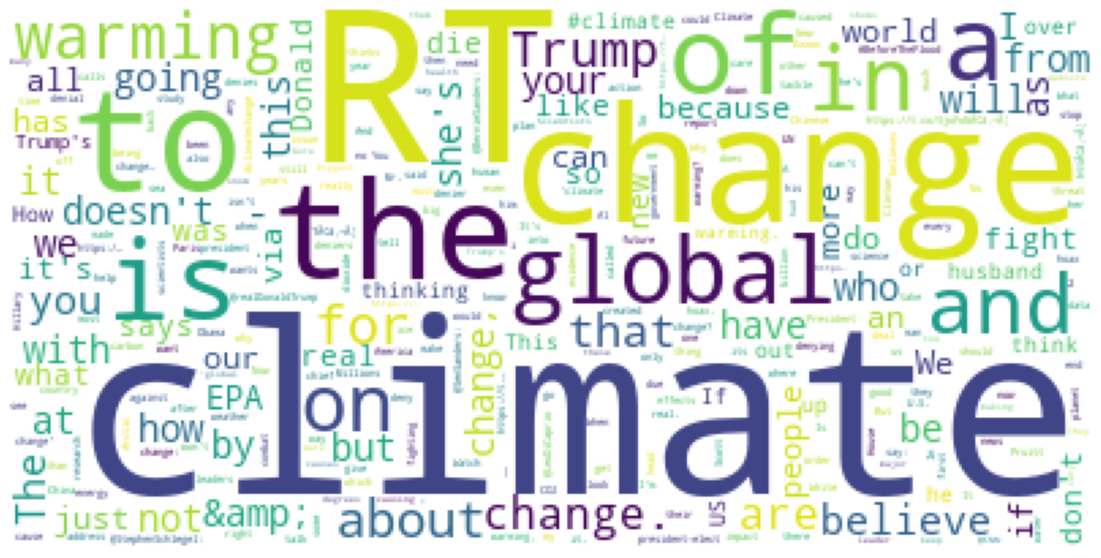

In [13]:
from wordcloud import WordCloud
wordList2 = " ".join(word_list)
stop_word_Cloud = set(stopwords.words("english"))
wordcloud = WordCloud(stopwords=stop_word_Cloud,max_words=2000,background_color="white",min_font_size=3).generate_from_frequencies(countedWordDict)
plt.figure(figsize=[20,10])
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

# Cleaning Data

In [14]:
## NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()
stopwordSet = set(stopwords.words("english"))

In [15]:
## Clean the text 
text_reviews = list()
t = list()

for i in range(len(train)):
    text = re.sub('[^a-zA-Z]'," ",train['message'][i])
    text = text.lower()
    text = word_tokenize(text,language="english")
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    text_reviews.append(text)
    
for i in range(len(test)):
    text = re.sub('[^a-zA-Z]'," ",test['message'][i])
    text = text.lower()
    text = word_tokenize(text,language="english")
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    t.append(text)

In [16]:
# Make lower case
print ('Lowering case...')
train['message'] = train['message'].str.lower()

# Remove punctuation
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
train['message'] = train['message'].apply(remove_punctuation_numbers)

Lowering case...
Cleaning punctuation...


# Train Test Split

Split the train_data into training and testing data. This is to make sure that there isn't any leakage of information when we actually fit the test_data that we imported. To avoid overfitting, we are using the train_data to train and test our models.

In [17]:
#Splitting you Data for X and Y
X_NB = train['message']
y = train['sentiment']

In [18]:
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_NB)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# model evaluation

# Logistic regression classification
Logistic Regression uses the probability of a data point to belonging to a certain class to classify each datapoint to it's best estimated class

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)

print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.8638569604086845
Testing accuracy Score :  0.7861635220125787
              precision    recall  f1-score   support

          -1       0.40      1.00      0.57         4
           0       0.41      0.73      0.52        15
           1       0.93      0.77      0.85       111
           2       0.80      0.83      0.81        29

    accuracy                           0.79       159
   macro avg       0.64      0.83      0.69       159
weighted avg       0.85      0.79      0.80       159



C:\Users\chauk\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Naive Bayes classification
Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications and assumes independent variables to be statistically independent from each other .

In [41]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)

NB_accuracy = accuracy_score(y_test,NB_prediction)

print("training accuracy Score: ", naiveByes_clf.score(X_train,y_train))
print("Testing accuracy Score : ", NB_accuracy )

print(classification_report(NB_prediction,y_test))

training accuracy Score:  0.7231924140655868
Testing accuracy Score :  0.6861567635903919
              precision    recall  f1-score   support

          -1       0.10      1.00      0.19        29
           0       0.10      0.98      0.18        44
           1       0.97      0.64      0.78      2650
           2       0.55      0.88      0.68       441

    accuracy                           0.69      3164
   macro avg       0.43      0.88      0.46      3164
weighted avg       0.89      0.69      0.75      3164



# Random forest classification
Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)

print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )

print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9986566574476492
Testing accuracy Score :  0.7117572692793932
              precision    recall  f1-score   support

          -1       0.17      0.92      0.29        52
           0       0.30      0.63      0.41       202
           1       0.93      0.69      0.79      2363
           2       0.63      0.81      0.71       547

    accuracy                           0.71      3164
   macro avg       0.51      0.76      0.55      3164
weighted avg       0.83      0.71      0.75      3164



# saving model

In [43]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 'Naive Bayes'],
    'Test accuracy': [ logreg_accuracy, 
              rf_accuracy, NB_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
0,Logistic Regression,0.750948
1,Random Forest,0.711757
2,Naive Bayes,0.686157


In [32]:
X_NB_test = test['message']
X_test =vector.transform(X_NB_test)

In [33]:
test_pred = logreg.predict(X_test)

test['sentiment'] = test_pred

subm = test[['tweetid','sentiment']]
subm.to_csv('sub.csv', index=False) # writing data to a CSV file

In [34]:
subm

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,0
